In [ ]:
!sudo nvidia-smi -pm 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random 
import os 
from PIL import Image
import glob

2022-12-31 08:59:12.452760: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ls: cannot access '/home/kalyan/DataSets/cats&dogs': No such file or directory


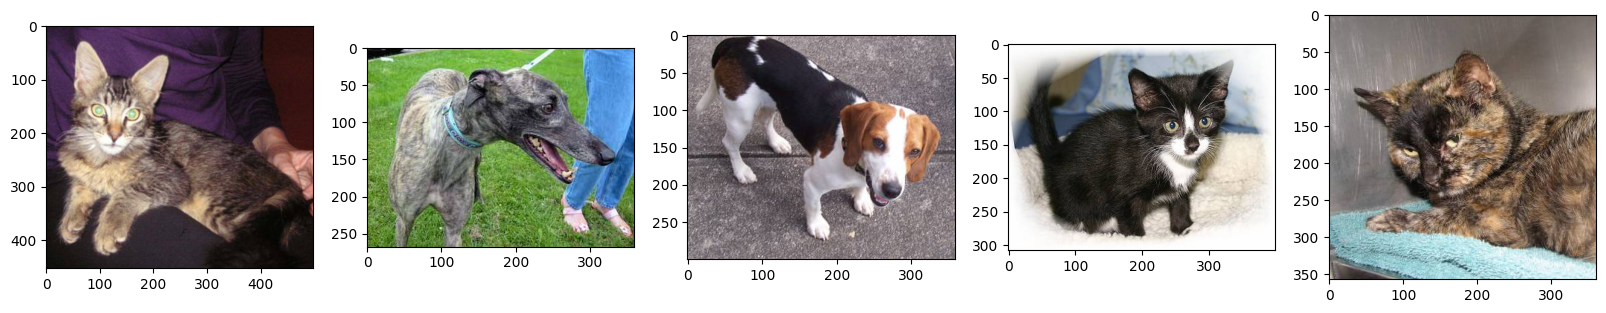

In [2]:
datapath = "/home/kalyan/DataSets/Dogs&Cats/"
!ls /home/kalyan/DataSets/cats\&dogs

#let's look at any 5 files in the in train folder
train_files = os.listdir(datapath+"train/")
#subplots
fig ,ax = plt.subplots(1,5,figsize=(20,20))
for i in range(5):
    img = Image.open(datapath+"train/"+train_files[i])
    ax[i].imshow(img)
    ax[i].axis('on')
plt.show()


In [13]:
train_files = glob.glob(datapath+"train/*")
train_labels = [i.strip(datapath+"train/")[:3] for i in train_files]
train_df = pd.DataFrame({'filename':train_files,'label':train_labels})
train_df.head()

nb_classes = len(glob.glob(datapath+"train/*"))

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=5,
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2)

# create a image data generator object. 
# all these are data augmentation parameters.

# now let's specify the image size to which each image will be resized to
img_height, img_width = 224, 224
batch_size = 32

In [5]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    subset='validation')

print("Class Indices: ",train_generator.class_indices)

Found 6400 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.
Class Indices:  {'cat': 0, 'dog': 1}


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(2, activation='softmax')
])

2022-12-31 08:59:15.221850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 08:59:15.247194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 08:59:15.247513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 08:59:15.248336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [7]:
plot_model(model,show_shapes=False,show_layer_names = True, dpi = 240)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
model.compile(loss='categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])


In [9]:
epoch = 10
history = model.fit(
    train_generator,
    epochs=epoch,
    validation_data=validation_generator,
)

Epoch 1/10


2022-12-31 08:59:18.265788: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


200/200 [==============================] - 72s 334ms/step - loss: 0.9668 - accuracy: 0.5738 - val_loss: 0.6887 - val_accuracy: 0.5569
Epoch 2/10
200/200 [==============================] - 70s 352ms/step - loss: 0.7124 - accuracy: 0.6291 - val_loss: 0.7673 - val_accuracy: 0.5494
Epoch 3/10
200/200 [==============================] - 97s 483ms/step - loss: 0.6402 - accuracy: 0.6603 - val_loss: 0.9303 - val_accuracy: 0.5994
Epoch 4/10
200/200 [==============================] - 84s 421ms/step - loss: 0.6069 - accuracy: 0.6797 - val_loss: 0.7812 - val_accuracy: 0.6244
Epoch 5/10
200/200 [==============================] - 84s 418ms/step - loss: 0.5972 - accuracy: 0.6802 - val_loss: 1.3498 - val_accuracy: 0.5875
Epoch 6/10
200/200 [==============================] - 79s 395ms/step - loss: 0.5880 - accuracy: 0.6828 - val_loss: 0.6829 - val_accuracy: 0.6719
Epoch 7/10
200/200 [==============================] - 80s 399ms/step - loss: 0.5727 - accuracy: 0.7038 - val_loss: 0.8177 - val_accuracy: 0.6

Transfer Learning

In [32]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Input
from tensorflow.keras.models import Model

# ResNet50 is our "backbone" of sorts, a CNN architecture 
# pretrained on the imagenet dataset
# we are only taking the CNN portion of it (include_top = False)
# and dropping the dense layer, we'll initialize a dense network of our own

basemodel = ResNet50(include_top = False, 
                   weights = 'imagenet',
                  input_shape=(img_height, img_width, 3)
                  
# use the output of the baseModel to create a "head"
headModel = basemodel.output
headModel = MaxPooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.8)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# at the end, we'll have two neurons, for two of the classes

# create a model object
model = Model(inputs=basemodel.input, outputs=headModel)

# we're "disabling" the backbone, and only training the head for this task
# we're assuming that the backbone is already sufficiently trained to generate
# features from images like ours.
# we can also "disable" all CNN layers except last 4
for layer in basemodel.layers[:-4]:
    layer.trainable = False

SyntaxError: invalid syntax (2438130320.py, line 15)

In [33]:
model.compile(loss='categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])


In [34]:
#setting up tensorboard
import datetime

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


epoch = 10
history = model.fit(
    train_generator,
    epochs=epoch,
    validation_data=validation_generator,
    #tensorboard as callback
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='logs')],
)


Epoch 1/10
200/200 [==============================] - 75s 371ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6933 - val_accuracy: 0.4888
Epoch 2/10
200/200 [==============================] - 77s 386ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5113
Epoch 3/10
200/200 [==============================] - 79s 396ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6933 - val_accuracy: 0.4888
Epoch 4/10
200/200 [==============================] - 78s 388ms/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.4888
Epoch 5/10
200/200 [==============================] - 79s 392ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6933 - val_accuracy: 0.4888
Epoch 6/10
200/200 [==============================] - 78s 388ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4888
Epoch 7/10
200/200 [==============================] - 79s 395ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_ac